In [113]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
df = pd.read_csv("D:\\ExcelR Assignments\\Assignment 9\\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Basic data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

In [17]:
columns = df.columns
columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

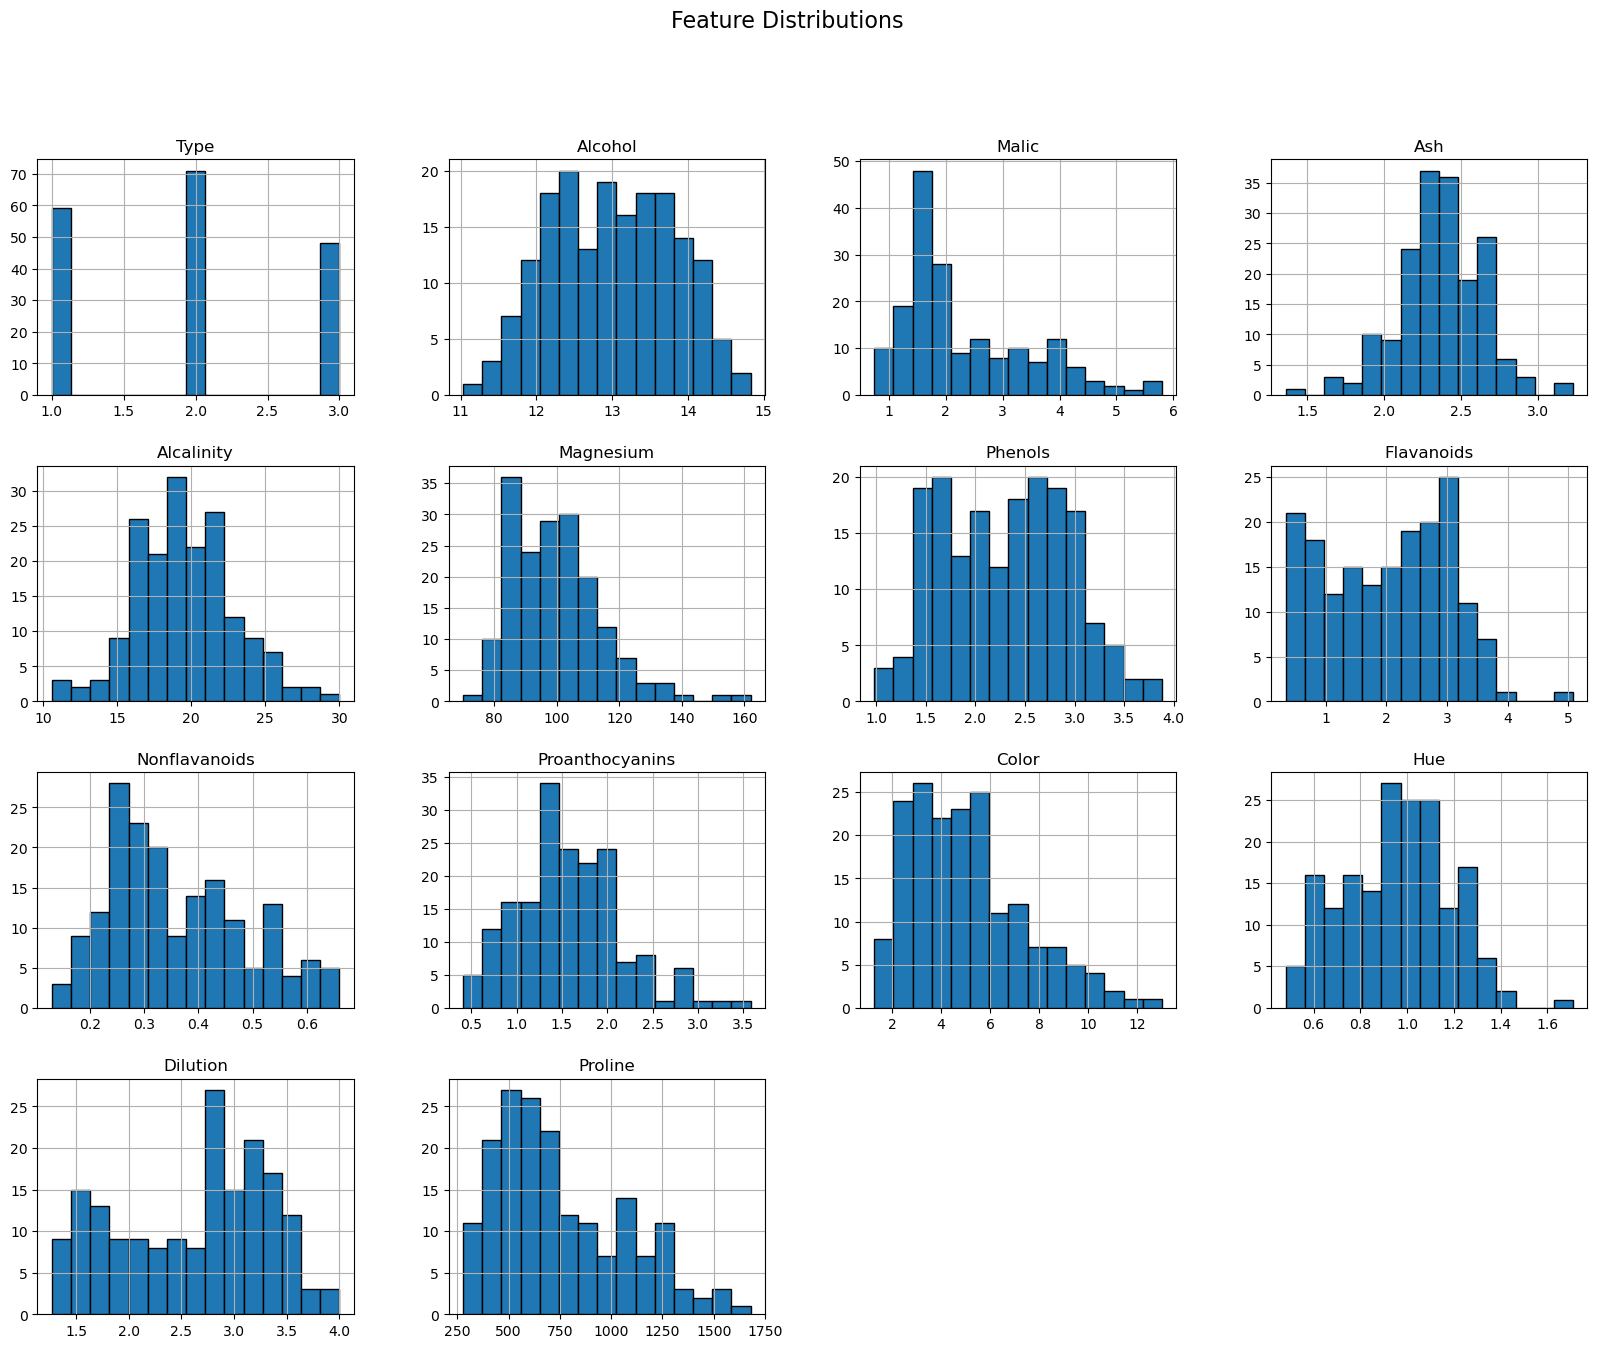

In [5]:
# Histograms for feature distributions
import matplotlib.pyplot as plt

df.hist(bins=15, figsize=(20, 15), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [179]:
# Most features show a normal distribution, but some ( Proline, Color) exhibit skewness.

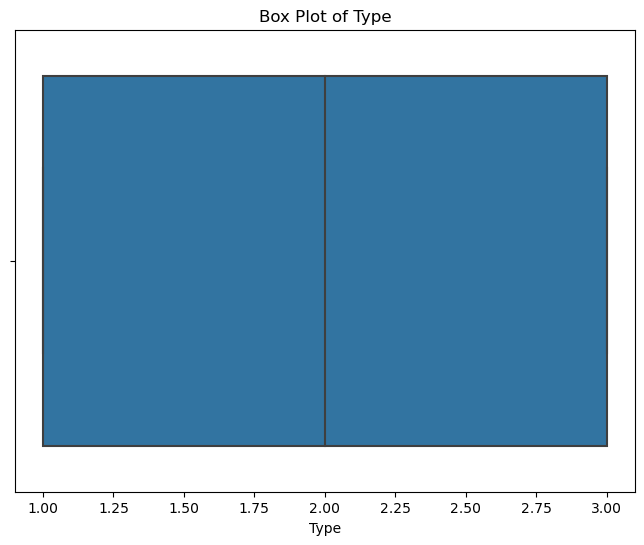

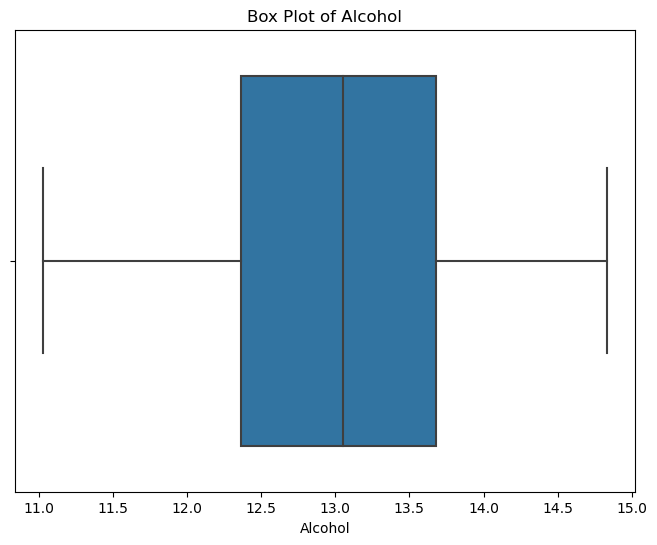

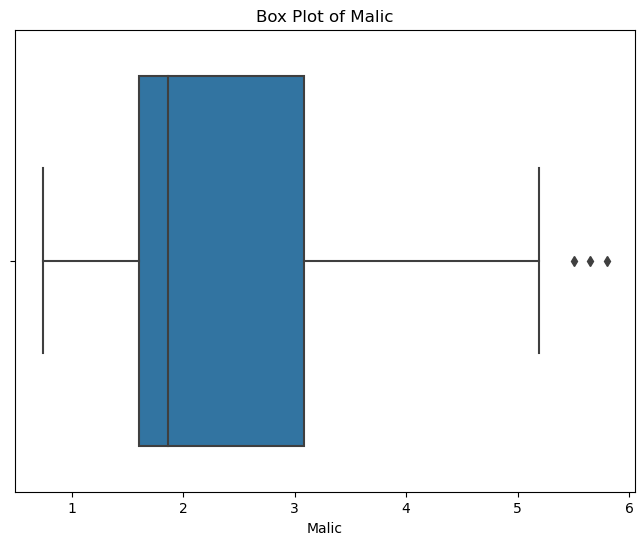

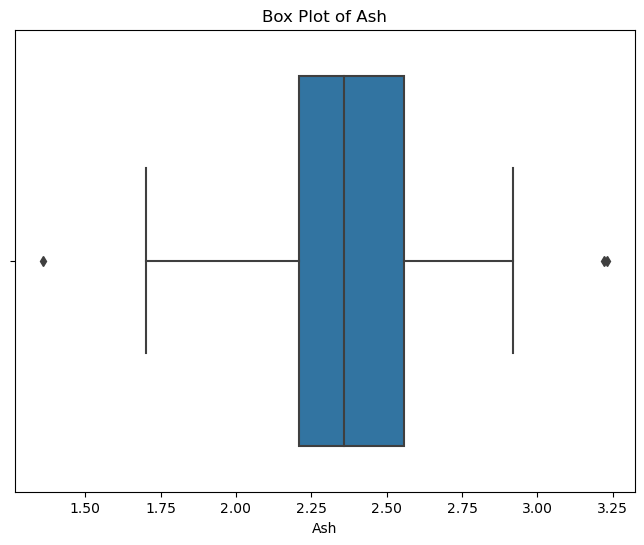

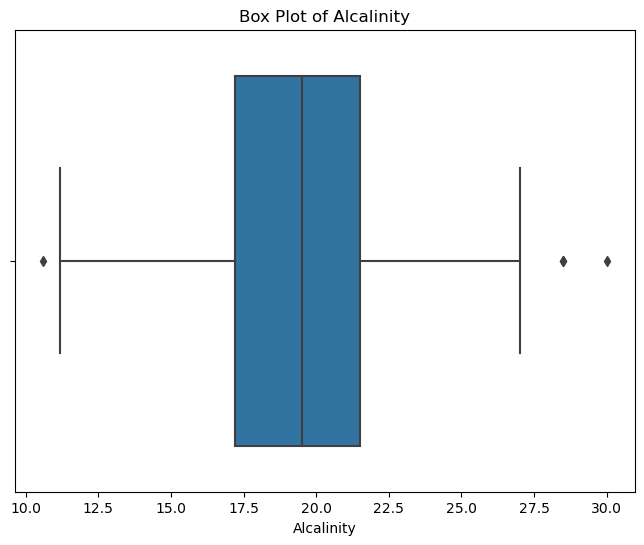

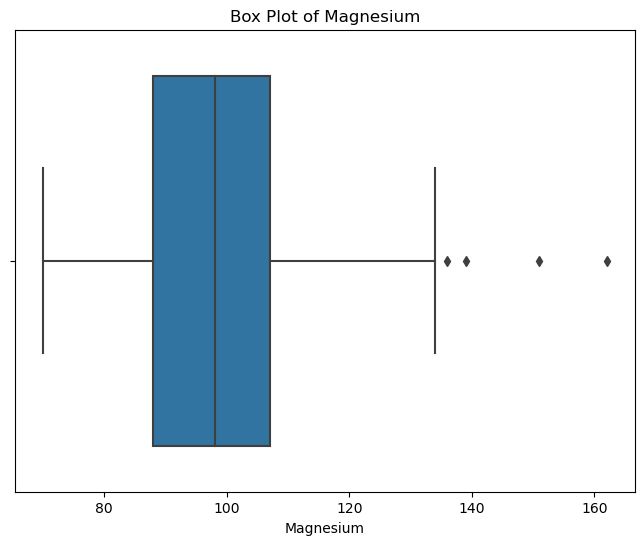

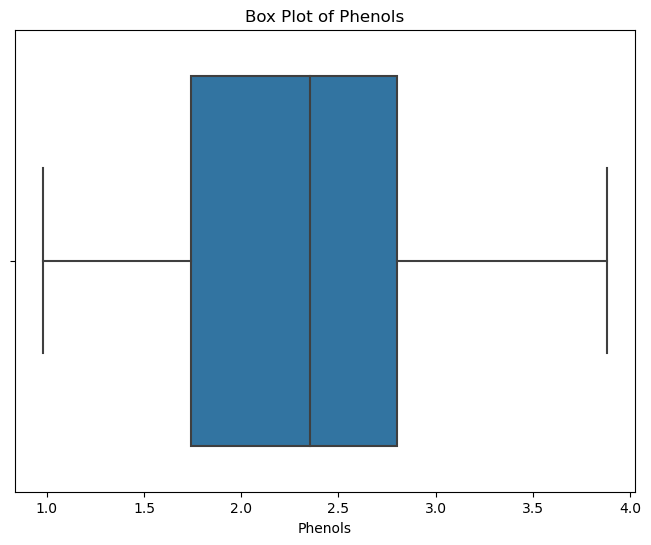

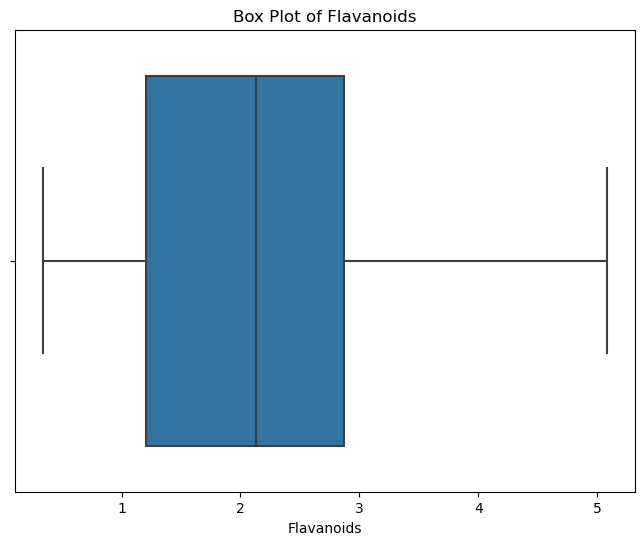

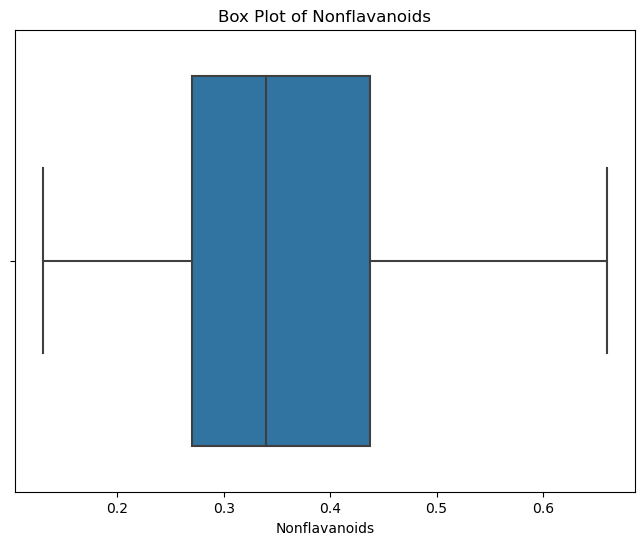

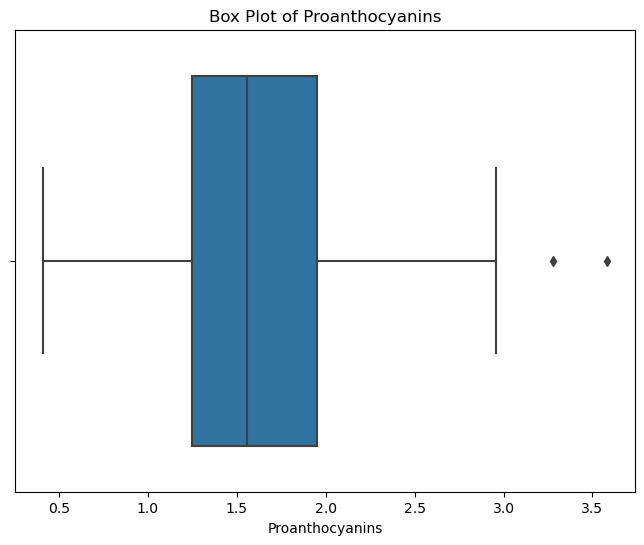

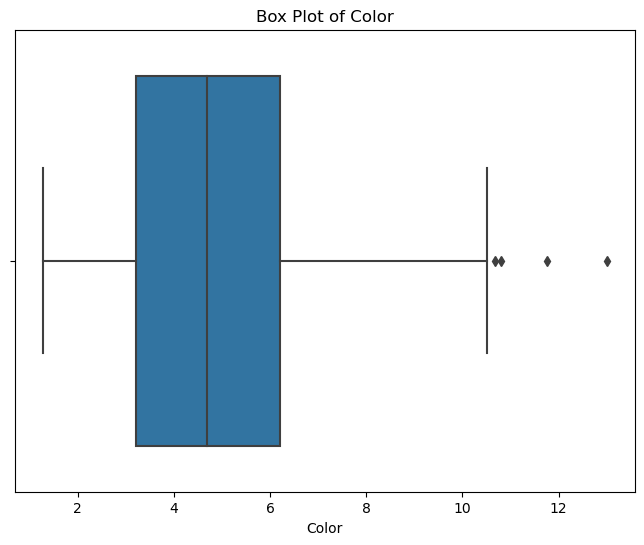

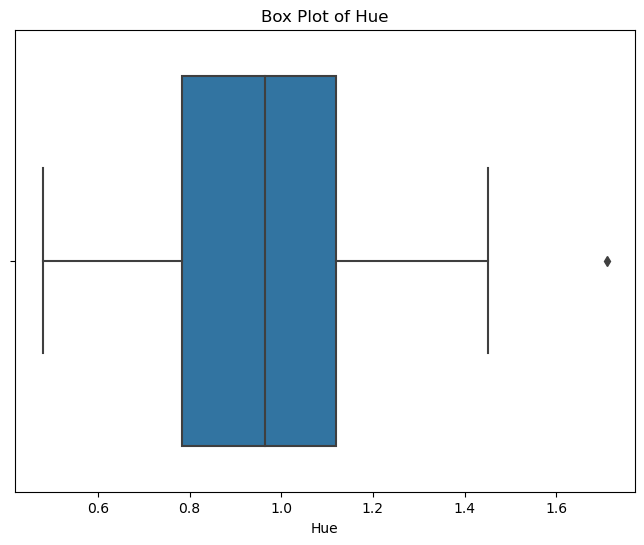

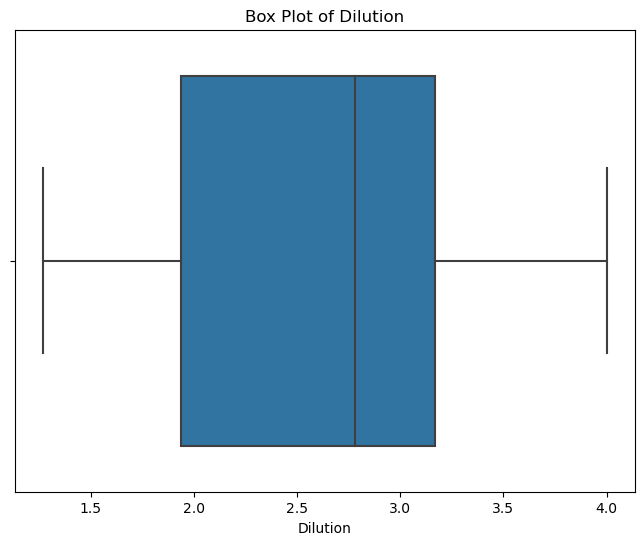

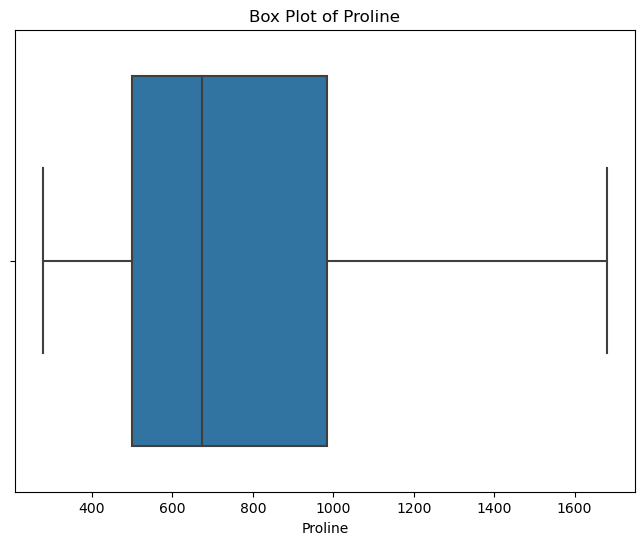

In [21]:
# Box plots for each feature
import seaborn as sns

for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [181]:
# Several features (Alcohol, Flavanoids, and Proline) show distinct differences across wine types,
#indicating their potential usefulness for classification.

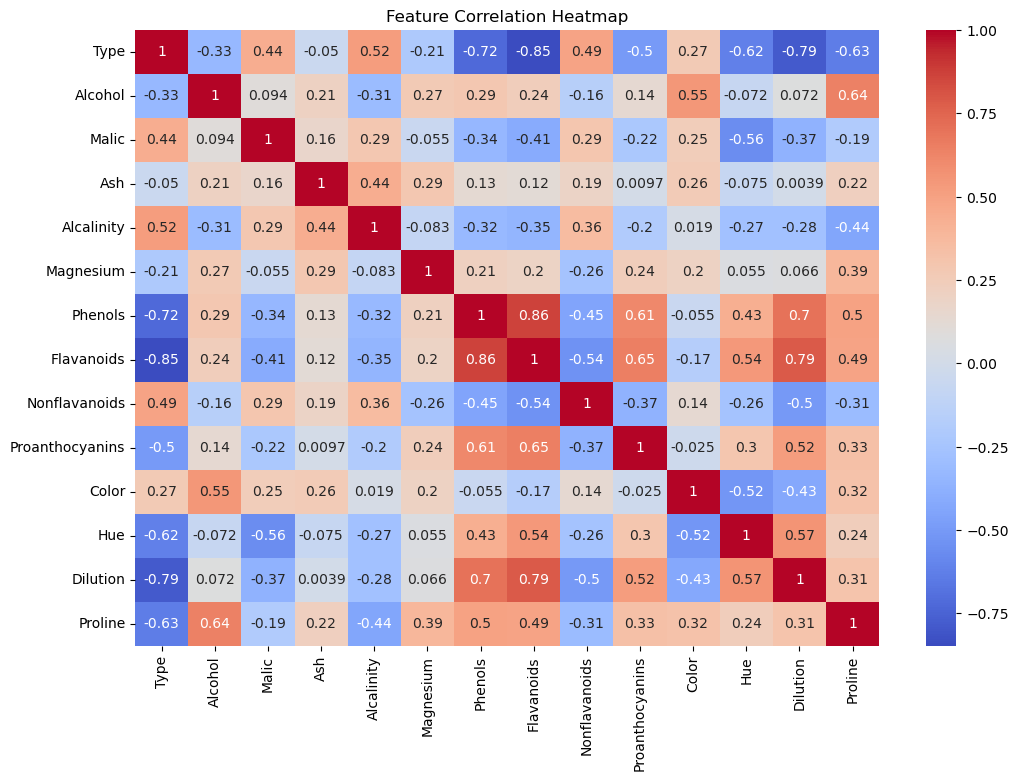

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
ss = StandardScaler()
df_ss = ss.fit_transform(df.iloc[:, 1:])
df_ss =  pd.DataFrame(df_ss)
df_ss

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.414250
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.414250
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.414250
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-0.643542
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0.042389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0.042389
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0.042389
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0.042389
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0.042389


In [99]:
# Perform PCA
pca = PCA()
pca = pca.fit(df_ss)

In [37]:
# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

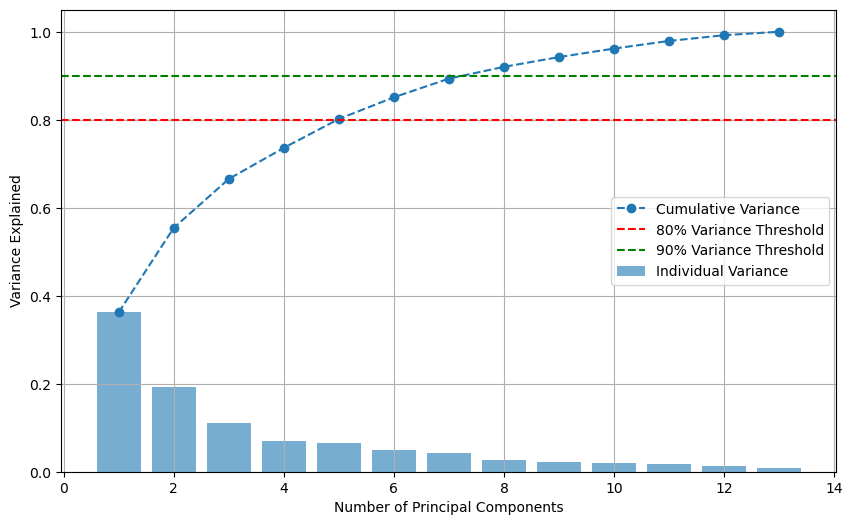

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance Threshold')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
pca.var()

0     4.732437
1     2.511081
2     1.454242
3     0.924166
4     0.858049
5     0.645282
6     0.554141
7     0.350466
8     0.290512
9     0.252320
10    0.227064
11    0.169724
12    0.103962
dtype: float64

In [83]:
#-----------------------------------------K-Means Clustering on Original Data---------------------------------------------

In [125]:
X = df_ss.iloc[:,:]

In [137]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster = KMeans(n_clusters=3)
df["kmeans"] = cluster.fit_predict(X)

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


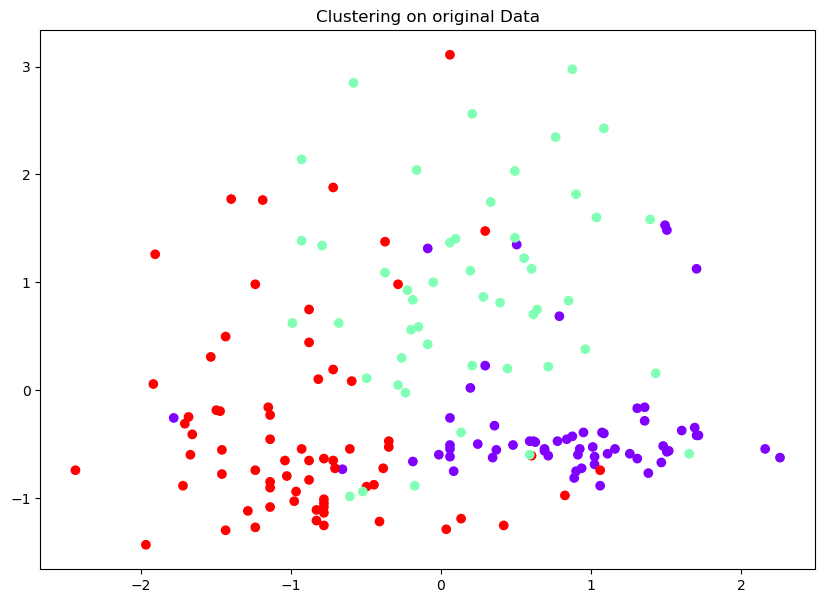

In [139]:
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap='rainbow')  
plt.title('Clustering on original Data')
plt.show()

In [141]:
m1= silhouette_score(X,df["kmeans"]) 
print("sihouette score: ",m1)

sihouette score:  0.26647076166958933


In [145]:
k_scores = []

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i,n_init=20)
    df["kmeans"] = cluster.fit_predict(X)
    k_scores.append(silhouette_score(X,df["kmeans"]) )

k_scores

[0.2572189280015464,
 0.26647076166958933,
 0.23898337360468017,
 0.23497237021395295,
 0.13709682413596203,
 0.1358411122586063,
 0.14458210178047046,
 0.14645835788341954,
 0.15097253883890577]

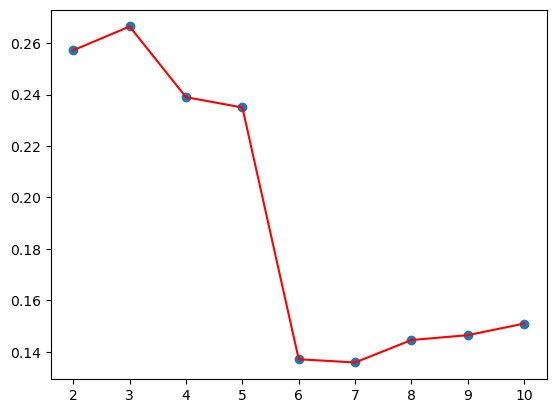

In [147]:
plt.scatter(x=range(2, 11),y=k_scores)
plt.plot(range(2, 11),k_scores,color='red')
plt.show()

In [81]:
# silhouette score is high when k=3

In [85]:
#-----------------------------------------------K-Means Clustering on PCA Data----------------------------------------

In [209]:
# From the PCA data ,I am takong the first 7 features

In [205]:

df_pca = pca.fit_transform(df_ss)
df_pca = pd.DataFrame(df_pca)

X_new = df_pca.iloc[:,0:7]

kmeans_pca = KMeans(n_clusters=3)
df["kmeans2"] = kmeans_pca.fit_predict(X_new)

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans,kmeans2
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


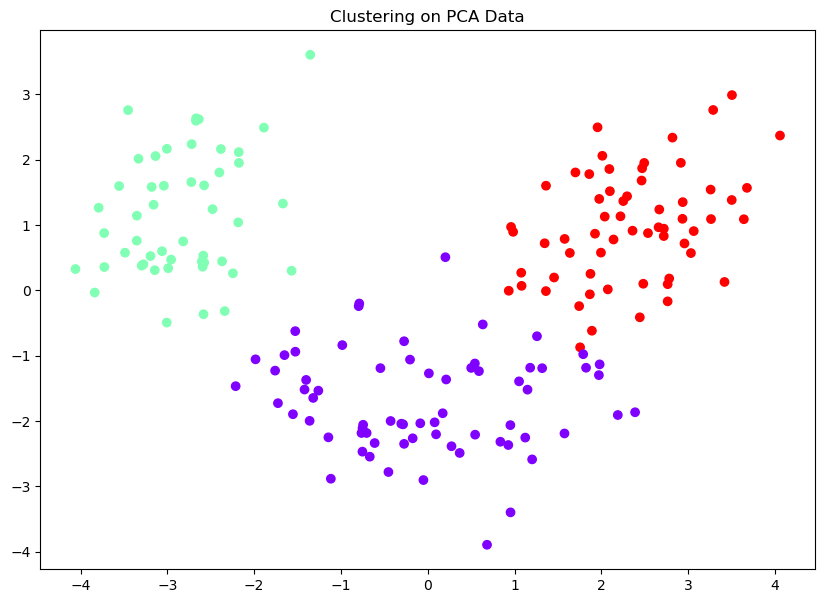

In [207]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_new.iloc[:,0], X_new.iloc[:,1], c=kmeans_pca.labels_, cmap='rainbow')  
plt.title('Clustering on PCA Data')
plt.show()

In [197]:
m2= silhouette_score(X_new,df["kmeans2"]) 
print("sihouette score: ",m2)

sihouette score:  0.31653703027777663


In [199]:
# Compare original and PCA clustering
print("Silhouette Score - Original Data:", silhouette_score(X, df['kmeans']))
print("Silhouette Score - PCA Data:", silhouette_score(X_new, df["kmeans2"]))

Silhouette Score - Original Data: 0.26647076166958933
Silhouette Score - PCA Data: 0.31653703027777663


In [ ]:
'''
The performance is well while reducing the dimensions using PCA.

Practical Implications of Using PCA and Clustering in Data Analysis:
  
   1. Dimensionality Reduction
   2. Noise Reduction
   3. By reducing dimensionality, PCA improves computational efficiency for clustering algorithms like K-Means or DBSCAN, 
      which are sensitive to high-dimensional data.
   4. Visualization Aid

When to Use PCA:

   1. High-Dimensional Datasets
   2. High Correlation Between Features
   3. Improving Computational Efficiency
   4. Noise Reduction

When to Use Clustering:

   1. Preserving Feature Interpretability
   2. Low to Moderate Dimensionality
   3. When analyzing which features contribute to the clustering process is important for business insights or decision-making.

Combined Use of PCA and Clustering:
   1. Large, Complex Datasets
   2. Exploratory Analysis
   3. Industry Applications

'''